In [1]:
%run __init__.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from itertools import combinations
from tools import *
from before_stack import *
from conversion import *
from aper_phot import *
from get_OH import *
from cr_to_flux import *

5.1824885234621e-16


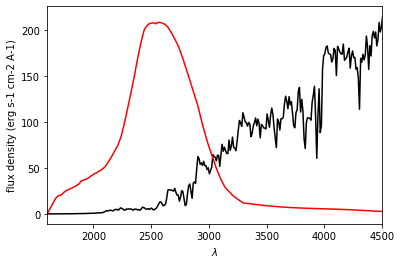

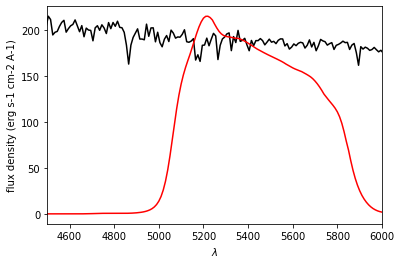

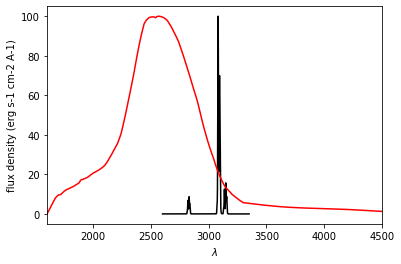

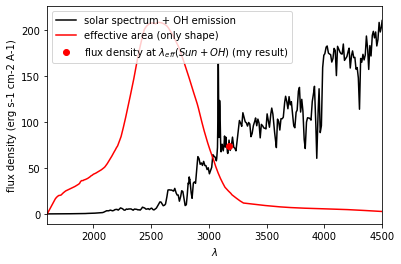

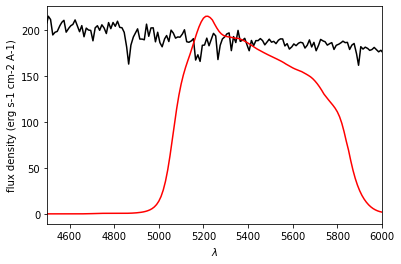

In [15]:
def spec_plot(spec_name, filt):
    # readin spec
    # spec_name: sun: sun_ref_colina96.asc.txt; OH of comet: 2019-07-15_emission_models_OH
    spec_path = get_path('../data/auxil/'+spec_name)
    spec_wave = np.loadtxt(spec_path)[:, 0]
    spec_flux = np.loadtxt(spec_path)[:, 1]
    if 'OH' in spec_name:
        spec_wave = spec_wave*10.
    # readin ea
    ea_path = get_path('../data/auxil/arf_'+filt+'.fits')
    ea_data = fits.open(ea_path)[1].data
    ea_wave = (ea_data['WAVE_MIN']+ea_data['WAVE_MAX'])/2
    ea_area = ea_data['SPECRESP']
    # filt bound
    lim = {'uw1_low': 1600,
           'uw1_up': 4500,
           'v_low': 4500,
           'v_up': 6000}
    ea_wave_norm = ea_wave[ea_wave>lim[filt+'_low']]
    ea_area_norm = ea_area[ea_wave>lim[filt+'_low']]
    ea_area_norm = ea_area_norm[ea_wave_norm<lim[filt+'_up']]
    spec_wave_norm = spec_wave[spec_wave>lim[filt+'_low']]
    spec_flux_norm = spec_flux[spec_wave>lim[filt+'_low']]
    spec_flux_norm = spec_flux_norm[spec_wave_norm<lim[filt+'_up']]
    ea_area = ea_area*np.max(spec_flux_norm)/np.max(ea_area_norm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(spec_wave, spec_flux, 'k-', label='solar spectrum + OH emission')
    plt.plot(ea_wave, ea_area, 'r-', label='effective area (only shape)')
    if spec_name=='cont_emis_sum.txt' and filt=='uw1':
        plt.plot(3176.233482245708,73.97031692925995, 'ro',label=r'flux density at $\lambda_{eff}(Sun+OH)$ (my result)')
#        plt.plot(2634, 13.482302500000001, 'bo',label=r'flux density at $\lambda_{eff}(Vega)$ (publications)')
        plt.legend()
    plt.xlim(lim[filt+'_low'], lim[filt+'_up'])
    plt.xlabel(r'$\lambda$')
    plt.ylabel('flux density (erg s-1 cm-2 A-1)')
    plt.show()
    
spec_plot('sun_ref_colina96.asc.txt', 'uw1')
spec_plot('sun_ref_colina96.asc.txt', 'v')
spec_plot('2019-07-15_emission_models_OH.txt', 'uw1')
spec_plot('cont_emis_sum.txt', 'uw1')
spec_plot('cont_emis_sum.txt', 'v')

In [3]:
def sum_spec_writeinfile(emis_name, cont_name, output_name):
    wave, sum_sp = sum_spec(emis_name, cont_name)
    output_path = get_path('../data/auxil/'+output_name)
    f = open(output_path, 'w')
    for i in range(len(wave)):
        f.write(str(wave[i])+' '+str(sum_sp[i])+'\n')
    f.close()

#sum_spec_writeinfile(, 'sun_ref_colina96.asc.txt', 'cont_emis_sum.txt')
sum_spec_writeinfile('sun_ref_colina96.asc.txt','cont_emis_sum.txt', 'OH_1A.txt')

In [2]:
print(eff_wave('cont_emis_sum.txt', 'uw1'))

NameError: name 'ea_ara' is not defined